## Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Columns**
- ageage in years
- sex(1 = male; 0 = female)
- cpchest pain type
- trestbpsresting blood pressure (in mm Hg on admission to the hospital)
- cholserum cholestoral in mg/dl
- fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecgresting electrocardiographic results
- thalachmaximum heart rate achieved
- exangexercise induced angina (1 = yes; 0 = no)
- oldpeakST depression induced by exercise relative to rest
- slopethe slope of the peak exercise ST segment
- canumber of major vessels (0-3) colored by flourosopy
- thal3 = normal; 6 = fixed defect; 7 = reversable defect
- target1 or 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../data/Heart_disease_UCI/heart.csv')

In [5]:
# Explore first five row of Data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Describe data as basic statistic
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
count = pd.value_counts(df['target'])
print("There are ",count[0],' of heart decease and ',count[1],' of non heart decease')

There are  138  of heart decease and  165  of non heart decease


<AxesSubplot:>

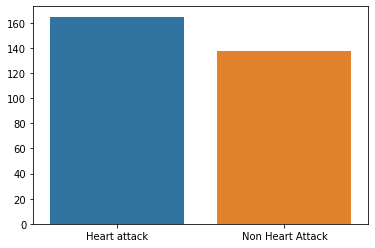

In [10]:
dicease,non_dicease = pd.value_counts(df['target'])
sns.barplot(x = ['Heart attack','Non Heart Attack'] ,y = [dicease,non_dicease])

In [11]:
def sex_appear(sex):
    Sex = []
    if sex == 0:
        Sex = 'female'
    else:
        Sex = 'male'
    return Sex

df['Sex'] = df['sex'].apply(sex_appear)

In [15]:
# df = df.drop(columns = 'Sex')

<AxesSubplot:>

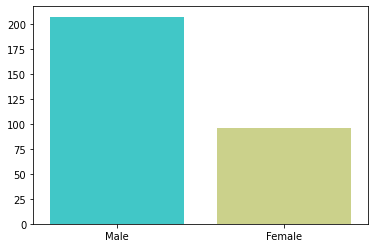

In [13]:
# Visual sex appear in this data
male,female = pd.value_counts(df['sex'])
sns.barplot(x = ['Male','Female'],y = [male,female],palette='rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

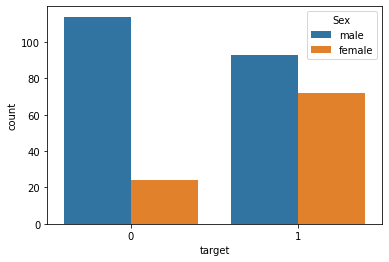

In [14]:
 sns.countplot(x = 'target',data = df,hue = 'Sex')

<AxesSubplot:xlabel='age', ylabel='trestbps'>

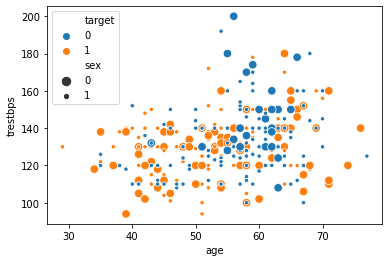

In [15]:
sns.scatterplot(x = 'age' , y = 'trestbps',data = df,hue = 'target',size = 'sex')

<AxesSubplot:xlabel='age', ylabel='chol'>

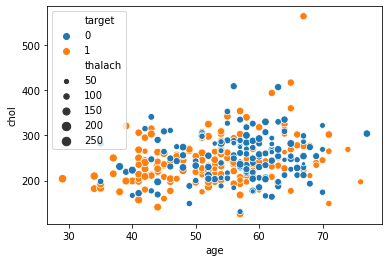

In [16]:
sns.scatterplot(x = 'age' , y = 'chol',data = df,hue = 'target',size = 'thalach')

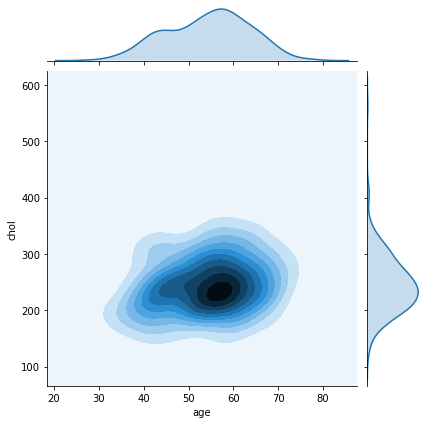

In [17]:
sns.jointplot(x = 'age' , y = 'chol',data = df,kind = 'kde')

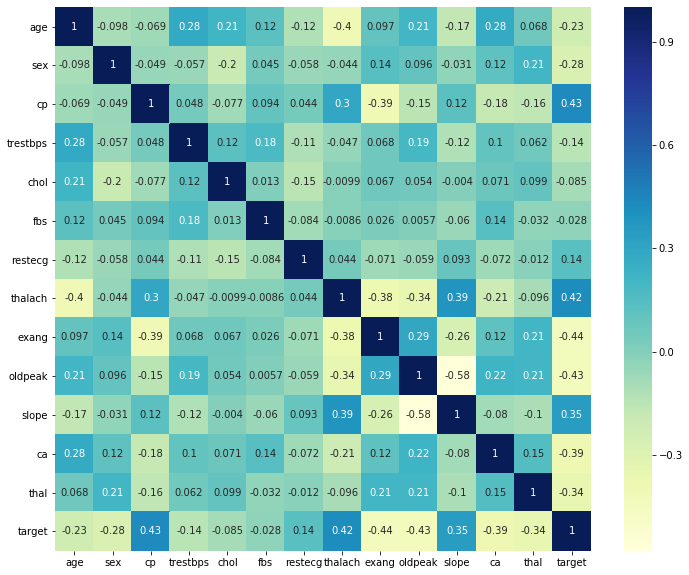

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True,cmap = 'YlGnBu')

In [52]:
#correlation with target
correlation = df.corr()['target']
print(correlation)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


In [74]:
# [correlation>0.3] or [correlation<-0.3]
# [correlation[correlation<-0.3]] or [correlation[correlation>0.3]]
correlation.index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# sns.pairplot(df,hue = 'target',kind = 'scatter')

In [20]:
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [24]:
X = df.drop(labels="target",axis = 1)
y = df["target"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Sex
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,male


In [19]:
# X = df.drop(columns = ['age', 'sex','trestbps','chol', 'fbs', 'restecg','target','Sex'])
# # X = df.drop(columns = ['target','Sex'])
# y = df['target']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35,random_state = 1)

In [79]:
pred = []
parameter = [{'penalty':['l1','l2'],
             'C':[0.1,0.2,0.3,0.4,1],
             'random_state':[1]}]
grid = GridSearchCV(LogisticRegression(),parameter,scoring='accuracy')
grid.fit(X_train,y_train)
pred = grid.predict(X_test)

C:\Users\natdanai.intraraksa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\natdanai.intraraksa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\natdanai.intraraksa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\natdanai.intraraksa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

In [80]:
grid.best_params_

{'C': 0.4, 'penalty': 'l2', 'random_state': 1}

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pro  = model.predict_proba(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
y_pred2 = []
for i in y_pro[:,1]:
    if i > 0.32:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [ ]:
print(accuracy_score(y_test,y_pred2))

In [ ]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_tree = model_tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_tree))